In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\anant\Desktop\reviews.csv")

In [3]:
data.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,"December 17, 2012",147643103,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,"December 17, 2012",147639004,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,"December 18, 2012",147697954,False
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,"December 17, 2012",147625723,False
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,"December 17, 2012",147612823,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ratings            10000 non-null  object
 1   title              10000 non-null  object
 2   text               10000 non-null  object
 3   author             10000 non-null  object
 4   date_stayed        9757 non-null   object
 5   offering_id        10000 non-null  int64 
 6   num_helpful_votes  10000 non-null  int64 
 7   date               10000 non-null  object
 8   id                 10000 non-null  int64 
 9   via_mobile         10000 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 713.0+ KB


In [5]:
df=data[["id","ratings"]]

In [6]:
df.head()

,id,ratings
0,147643103,"{'service': 5.0, 'cleanliness': 5.0, 'overall'..."
1,147639004,"{'service': 5.0, 'cleanliness': 5.0, 'overall'..."
2,147697954,"{'service': 4.0, 'cleanliness': 5.0, 'overall'..."
3,147625723,"{'service': 5.0, 'cleanliness': 5.0, 'overall'..."
4,147612823,"{'service': 4.0, 'cleanliness': 5.0, 'overall'..."


In [7]:
#Abstract Syntax Trees
import ast
df['ratings'] = df['ratings'].apply(ast.literal_eval)
df = pd.concat([df.drop(['ratings'], axis=1), pd.json_normalize(df['ratings'])], axis=1)

C:\Users\anant\AppData\Local\Temp\ipykernel_25680\2506144524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'] = df['ratings'].apply(ast.literal_eval)


In [8]:
df.head()

,id,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
0,147643103,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,147639004,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
2,147697954,4.0,5.0,4.0,4.0,5.0,4.0,4.0,NaN,NaN
3,147625723,5.0,5.0,4.0,5.0,5.0,5.0,5.0,NaN,NaN
4,147612823,4.0,5.0,4.0,3.0,5.0,5.0,5.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      10000 non-null  int64  
 1   service                                 9231 non-null   float64
 2   cleanliness                             9207 non-null   float64
 3   overall                                 10000 non-null  float64
 4   value                                   9177 non-null   float64
 5   location                                8330 non-null   float64
 6   sleep_quality                           7110 non-null   float64
 7   rooms                                   8524 non-null   float64
 8   check_in_front_desk                     638 non-null    float64
 9   business_service_(e_g_internet_access)  494 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


In [11]:
df.columns
#row = df.loc[df['id'] == 147643103]

Index(['id', 'service', 'cleanliness', 'overall', 'value', 'location',
       'sleep_quality', 'rooms', 'check_in_front_desk',
       'business_service_(e_g_internet_access)'],
      dtype='object')

In [12]:
df.shape

(10000, 10)

In [13]:
ratings = df.drop(["id", "overall"], axis=1)
overall_ratings = df["overall"]

In [14]:
overall_ratings = df["overall"]

In [15]:
ratings.columns

Index(['service', 'cleanliness', 'value', 'location', 'sleep_quality', 'rooms',
       'check_in_front_desk', 'business_service_(e_g_internet_access)'],
      dtype='object')

## Data Preprocessing

In [16]:
ratings.fillna(0, inplace=True)

In [17]:
ratings = ratings.astype(float)

## Correlation Matrix 

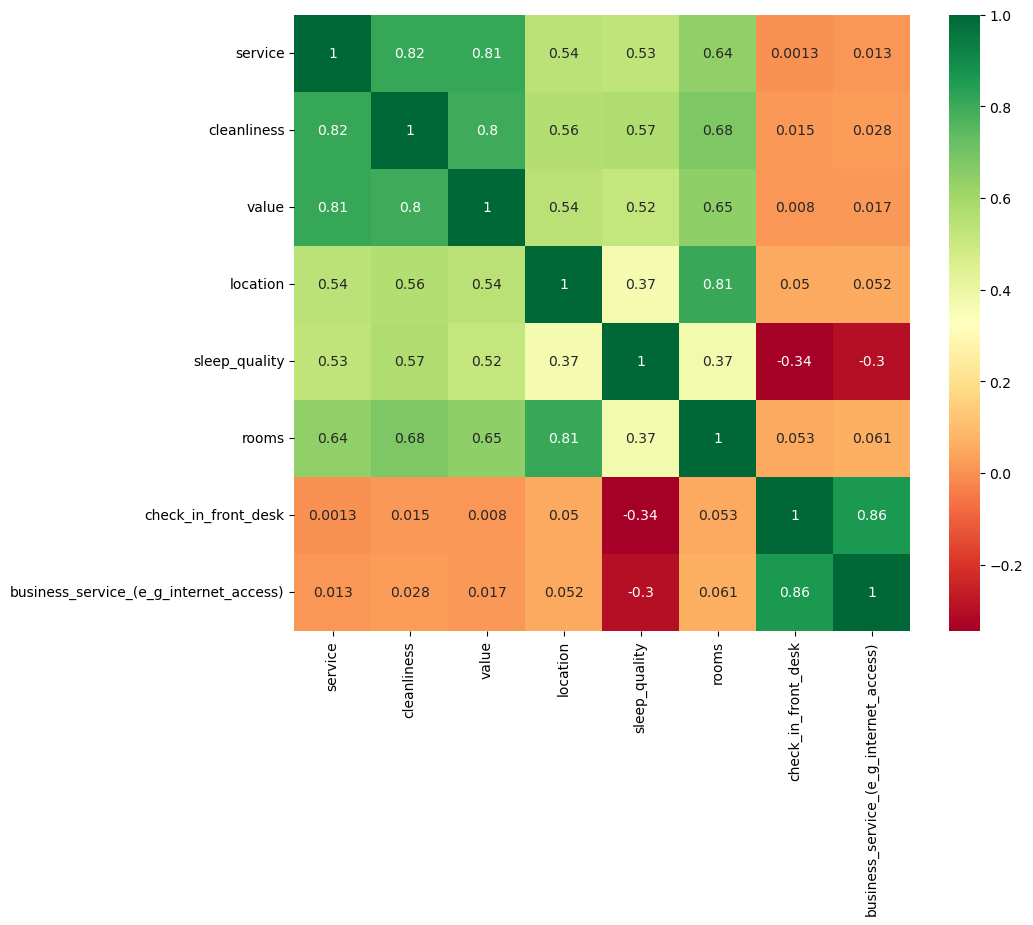

In [18]:
correlation_matrix = ratings.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, square=True, annot=True, cmap='RdYlGn')
plt.show()

## Normalization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
scaler.fit(ratings)

StandardScaler()

In [22]:
scaled_data=scaler.transform(ratings)

In [23]:
scaled_data

array([[ 0.73454887,  0.70064215,  0.87228012, ...,  0.86709563,
        -0.24404518, -0.21293036],
       [ 0.73454887,  0.70064215,  0.87228012, ...,  0.86709563,
        -0.24404518, -0.21293036],
       [ 0.11457177,  0.70064215,  0.24179214, ...,  0.31554317,
        -0.24404518, -0.21293036],
       ...,
       [ 0.11457177,  0.07657325, -0.38869584, ..., -1.8906667 ,
        -0.24404518, -0.21293036],
       [ 0.73454887,  0.70064215,  0.24179214, ..., -1.8906667 ,
        -0.24404518, -0.21293036],
       [ 0.73454887,  0.70064215,  0.87228012, ...,  0.86709563,
        -0.24404518, -0.21293036]])

In [24]:
from sklearn.model_selection import train_test_split
x_train_model, x_test_model, y_train_model, y_test_model = train_test_split(scaled_data, overall_ratings, test_size=0.2, random_state=42)

In [25]:
x_train_model.shape

(8000, 8)

In [26]:
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  

In [27]:
pca = PCA(n_components=5) 

In [28]:
reg = LinearRegression() 
pipeline = Pipeline(steps=[('pca', pca),('reg', reg)]) 

In [29]:
pipeline.fit(x_train_model, y_train_model) 

Pipeline(steps=[('pca', PCA(n_components=5)), ('reg', LinearRegression())])

In [30]:
predictions_model = pipeline.predict(x_test_model)

## Evaluation Measures of the Proposed Model

In [31]:
mae_model = mean_absolute_error(y_test_model,predictions_model) 

In [32]:
print("Mean Absolute Error of the model is :", round(mae_model, 2))

Mean Absolute Error of the model is : 0.68


In [35]:
mse_model = mean_squared_error(y_test_model,predictions_model) 
print("Mean Squared Error of the model is :", round(mse_model, 2))

Mean Squared Error of the model is : 0.85


In [36]:
rmse_model = np.sqrt(mse_model) 
print(" Root Mean Squared Error of the model is :", round(rmse_model, 2))

 Root Mean Squared Error of the model is : 0.92


In [38]:
# Compute R-squared (R²) score
r2_model = r2_score(y_test_model, predictions_model)
print("R2 Score of the model is :", round(r2_model, 2))

R2 Score of the model is : 0.47


## Linear Regression Model

In [39]:
from sklearn.model_selection import train_test_split
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(ratings, overall_ratings, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  

In [41]:
reg = LinearRegression() 

In [42]:
reg.fit(x_train_lr,y_train_lr)

LinearRegression()

In [43]:
predictions_without_pca = reg.predict(x_test_lr)

## Evaluation Measures of the Linear Regression Model

In [44]:
mae_lr = mean_absolute_error(y_test_lr,predictions_without_pca) 
print("Mean Absolute Error of the model is :", round(mae_lr, 2))

Mean Absolute Error of the model is : 0.67


In [45]:
mse_lr = mean_squared_error(y_test_lr,predictions_without_pca) 
print("Mean Squared Error of the model is :", round(mse_lr, 2))

Mean Squared Error of the model is : 0.82


In [46]:
rmse_lr = np.sqrt(mse_lr) 
print(" Root Mean Squared Error of the model is :", round(rmse_lr, 2))

 Root Mean Squared Error of the model is : 0.91


In [47]:
r2_lr = r2_score(y_test_lr, predictions_without_pca)
print("R2 Score of the model is :", round(r2_lr, 2))

R2 Score of the model is : 0.49
